<a href="https://colab.research.google.com/github/Shihab7u/Brain-Tumor-Detection-and-Classification/blob/main/CovBi_GRU-(Dataset_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install matplotlib_inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1nt6PoC3EUD1F4Ct9xYa7fEs86aM58LHW/view?usp=share_link

Downloading...
From: https://drive.google.com/uc?id=1nt6PoC3EUD1F4Ct9xYa7fEs86aM58LHW
To: /content/BRAIN_DATA.zip
100% 879M/879M [00:03<00:00, 236MB/s]


In [ ]:
!unzip "/content/BRAIN_DATA.zip" > /dev/null  #-d "/content/Brain Tumor Dataset"

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2

In [ ]:
# Now Take All the data into a list
data_dir='/content/BRAIN_DATA'
total_image=3064
trainindata=[]
for i in range(1,total_image+1):
  filename=str(i)+".mat"
  data=h5py.File(os.path.join(data_dir,filename),"r")
  trainindata.append(data)

  if i%100==0:
    print(filename)

100.mat
200.mat
300.mat
400.mat
500.mat
600.mat
700.mat
800.mat
900.mat
1000.mat
1100.mat
1200.mat
1300.mat
1400.mat
1500.mat
1600.mat
1700.mat
1800.mat
1900.mat
2000.mat
2100.mat
2200.mat
2300.mat
2400.mat
2500.mat
2600.mat
2700.mat
2800.mat
2900.mat
3000.mat


In [ ]:
trainindata[0]["cjdata"]["image"]

<HDF5 dataset "image": shape (512, 512), type "<i2">

In [ ]:
import keras
import random
random.shuffle(trainindata)

In [ ]:
import numpy as np
 # Now take all the image as train and test
trainx=[]
trainy=[]
testx=[]
testy=[]

size=round(4*total_image/5) # Split the dataset into 80:20
# For trainx and trainy
for i in range(size):
  image=trainindata[i]["cjdata"]["image"][()]
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    trainx.append(image)

    label=int(trainindata[i]["cjdata"]["label"][()])-1
    trainy.append(label)
# For trainx and trainy
for i in range(size,total_image):
  image=trainindata[i]["cjdata"]["image"][()]
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    testx.append(image)

    label=int(trainindata[i]["cjdata"]["label"][()])-1
    testy.append(label)

In [ ]:
# Converting list to numpy array
trainx=np.array(trainx).reshape(-1,512,512)
testx=np.array(testx).reshape(-1,512,512)
trainy=np.array(trainy)
testy=np.array(testy)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2440, 512, 512)
(609, 512, 512)
(2440,)
(609,)


In [ ]:
#Model building starts
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Conv1D,MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
tf.keras.backend.clear_session()
from tensorflow.keras.layers import Input,Bidirectional,LSTM,Lambda, GRU

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model = Sequential()
model.add(Conv1D(64, 4, activation='relu', input_shape = (512,512))) #3 Conv1D
model.add(MaxPooling1D(pool_size=2)) #2
model.add(BatchNormalization())
# # model.add(Dropout(0.2))

model.add(Bidirectional(GRU(64, return_sequences=True)))

model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
# # model.add(Dropout(0.2))


model.add(Bidirectional(GRU(128, return_sequences=True)))

model.add(Conv1D(128, 2, activation='relu')) #2
#model.add(Conv1D(128, 2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
# #model.add(Dropout(0.2))





model.add(Flatten())
model.add(Dense(128, activation='relu')) #128
model.add(Dropout(0.2)) #0.3
model.add(BatchNormalization())
model.add(Dense(128, activation='softmax')) #128

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 509, 64)           131136    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 254, 64)          0         
 1D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 254, 64)          256       
 hNormalization)                                                 
                                                                 
 bidirectional_2 (Bidirectio  (None, 254, 128)         49920     
 nal)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 252, 64)           24640     
                                                      

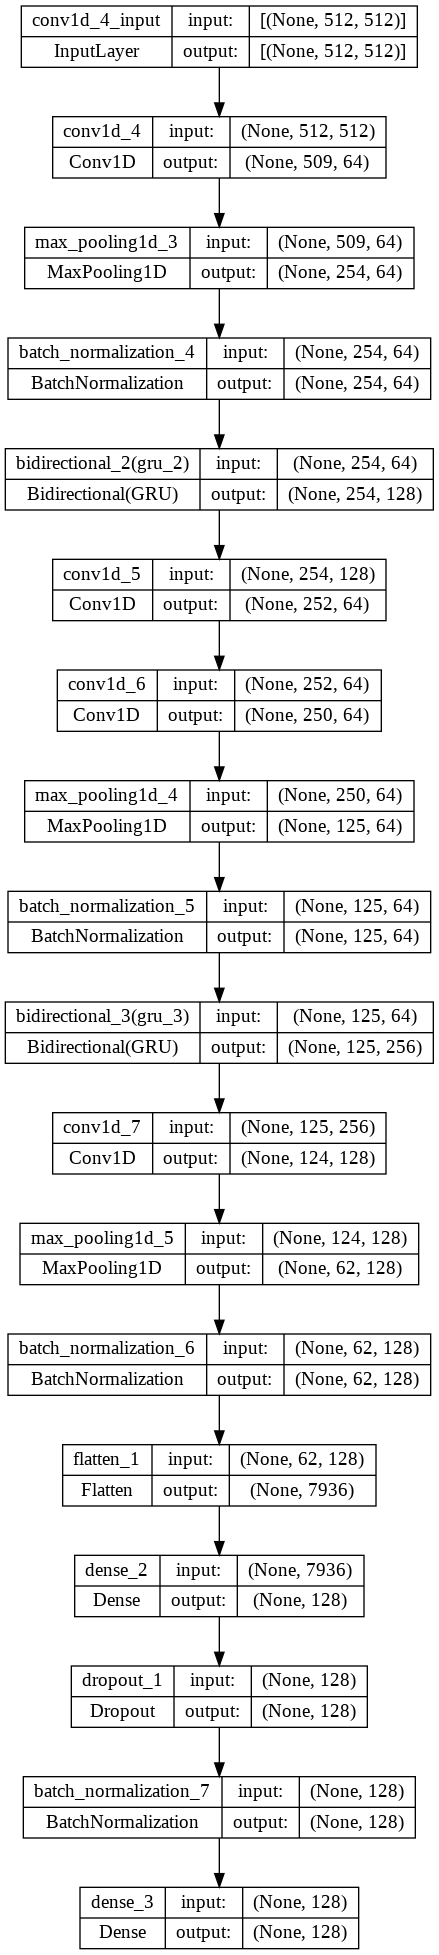

In [ ]:
# plot model architecture
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='CNN + BiGRU_architecture.png')

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
r=model.fit(trainx,
          trainy,
          epochs=80,
          batch_size=32,
          verbose=1,
          validation_data=(testx,testy),
          shuffle=False
          )

Epoch 1/80
77/77 [==============================] - 21s 73ms/step - loss: 1.6707 - accuracy: 0.7439 - val_loss: 3.5117 - val_accuracy: 0.6568
Epoch 2/80
77/77 [==============================] - 4s 48ms/step - loss: 0.6413 - accuracy: 0.8557 - val_loss: 1.0779 - val_accuracy: 0.7767
Epoch 3/80
77/77 [==============================] - 4s 49ms/step - loss: 0.3510 - accuracy: 0.9049 - val_loss: 0.8081 - val_accuracy: 0.7767
Epoch 4/80
77/77 [==============================] - 4s 48ms/step - loss: 0.2523 - accuracy: 0.9184 - val_loss: 0.4831 - val_accuracy: 0.8358
Epoch 5/80
77/77 [==============================] - 4s 49ms/step - loss: 0.2172 - accuracy: 0.9320 - val_loss: 0.4866 - val_accuracy: 0.8654
Epoch 6/80
77/77 [==============================] - 4s 49ms/step - loss: 0.1699 - accuracy: 0.9459 - val_loss: 0.6867 - val_accuracy: 0.8227
Epoch 7/80
77/77 [==============================] - 4s 48ms/step - loss: 0.1105 - accuracy: 0.9648 - val_loss: 0.2867 - val_accuracy: 0.8916
Epoch 8/80
7

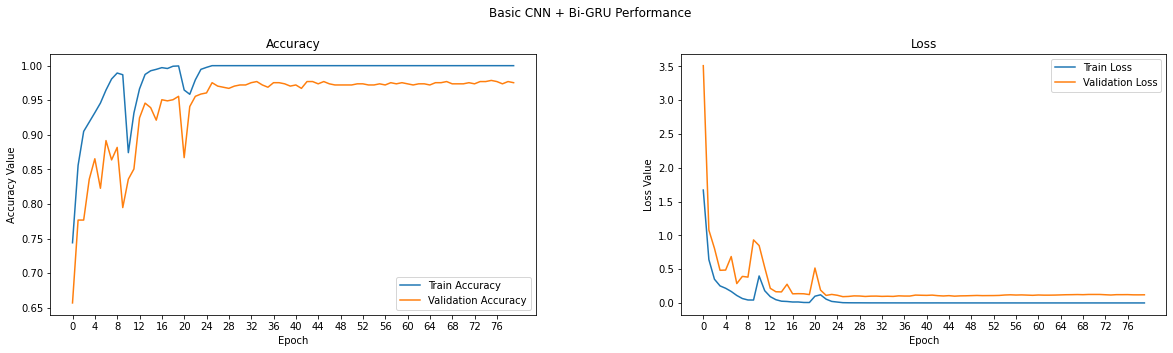

In [ ]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
t = f.suptitle('Basic CNN + Bi-GRU Performance', fontsize=12 )
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,80))
ax1.plot(epoch_list, r.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, r.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 80, 4))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, r.history['loss'], label='Train Loss')
ax2.plot(epoch_list, r.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 80, 4))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


plt.savefig('CNN + Bi-GRU Performance.png')




In [ ]:
pred=model.predict(testx)
Y_pred = np.argmax(pred, 1)

20/20 [==============================] - 2s 28ms/step


In [ ]:
Y_pred.shape

(609,)

In [ ]:
testy.shape

(609,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(testy, Y_pred))

Confusion Matrix
[[140   4   3]
 [  7 267   0]
 [  0   1 187]]


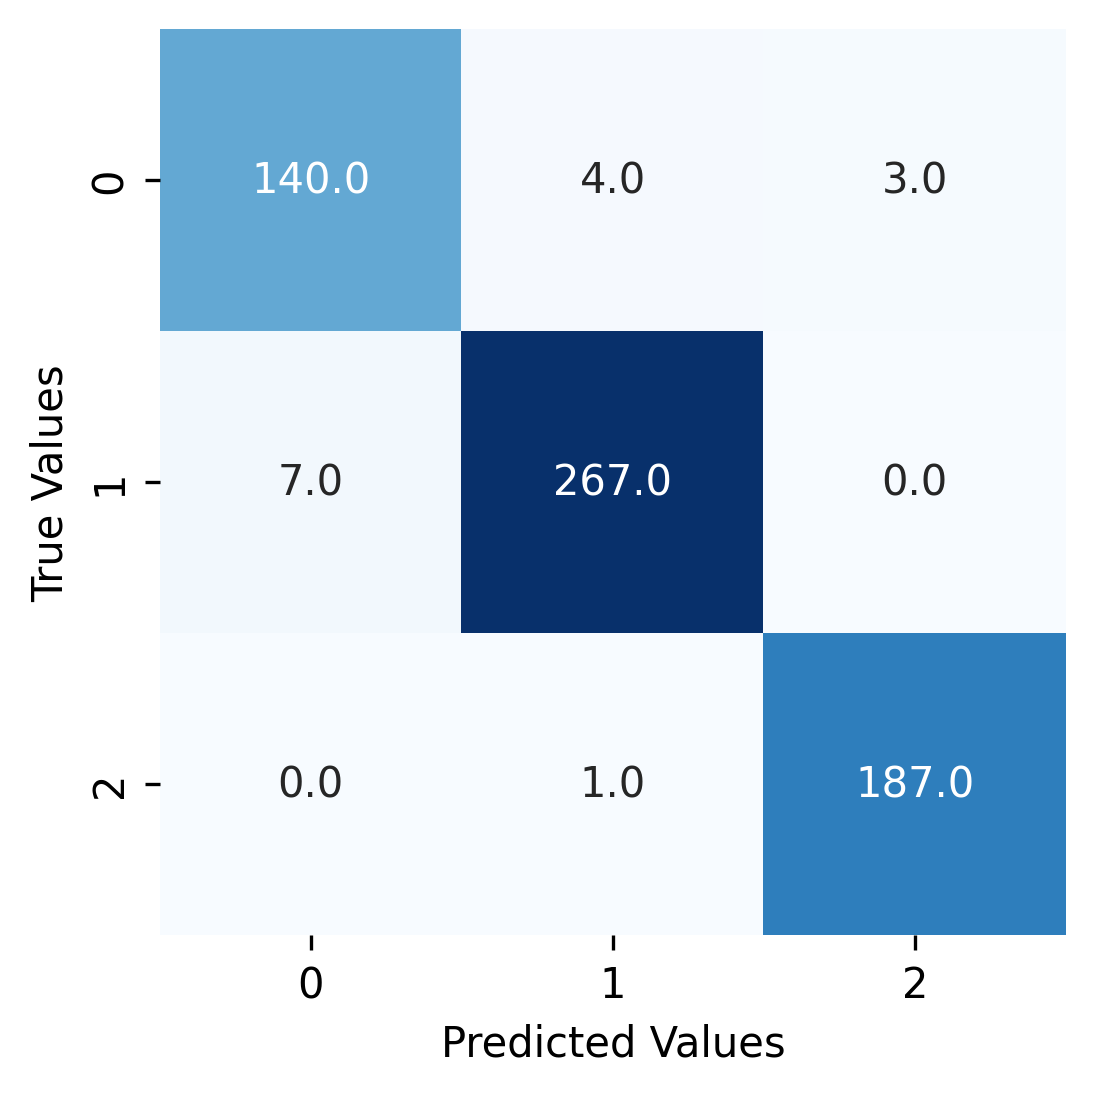

In [ ]:
import seaborn as sns
cm=confusion_matrix(testy, Y_pred)
plt.figure(dpi=300),sns.heatmap(cm, square=True, annot=True, fmt=".1f", cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

In [ ]:
print('Classification Report')
target_names = ['Meningioma', 'Glioma', 'Pituitary']
print(classification_report(testy, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

  Meningioma       0.95      0.95      0.95       147
      Glioma       0.98      0.97      0.98       274
   Pituitary       0.98      0.99      0.99       188

    accuracy                           0.98       609
   macro avg       0.97      0.97      0.97       609
weighted avg       0.98      0.98      0.98       609



In [ ]:
print(trainy)

[1 2 1 ... 0 1 1]


[Text(0, 0.5, 'Meningioma'), Text(0, 1.5, 'Glioma'), Text(0, 2.5, 'Pituitary')]

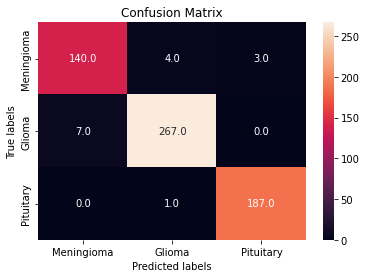

<Figure size 1800x1200 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax= plt.subplot()
plt.figure(dpi=300),sns.heatmap(cm, annot=True, ax = ax, fmt=".1f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Meningioma', 'Glioma', 'Pituitary']); ax.yaxis.set_ticklabels(['Meningioma', 'Glioma', 'Pituitary'])


Confusion Matrix :
[[140   4   3]
 [  7 267   0]
 [  0   1 187]]
Accuracy Score : 0.9753694581280788
Report : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       147
           1       0.98      0.97      0.98       274
           2       0.98      0.99      0.99       188

    accuracy                           0.98       609
   macro avg       0.97      0.97      0.97       609
weighted avg       0.98      0.98      0.98       609



(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbd6b24d9a0>)

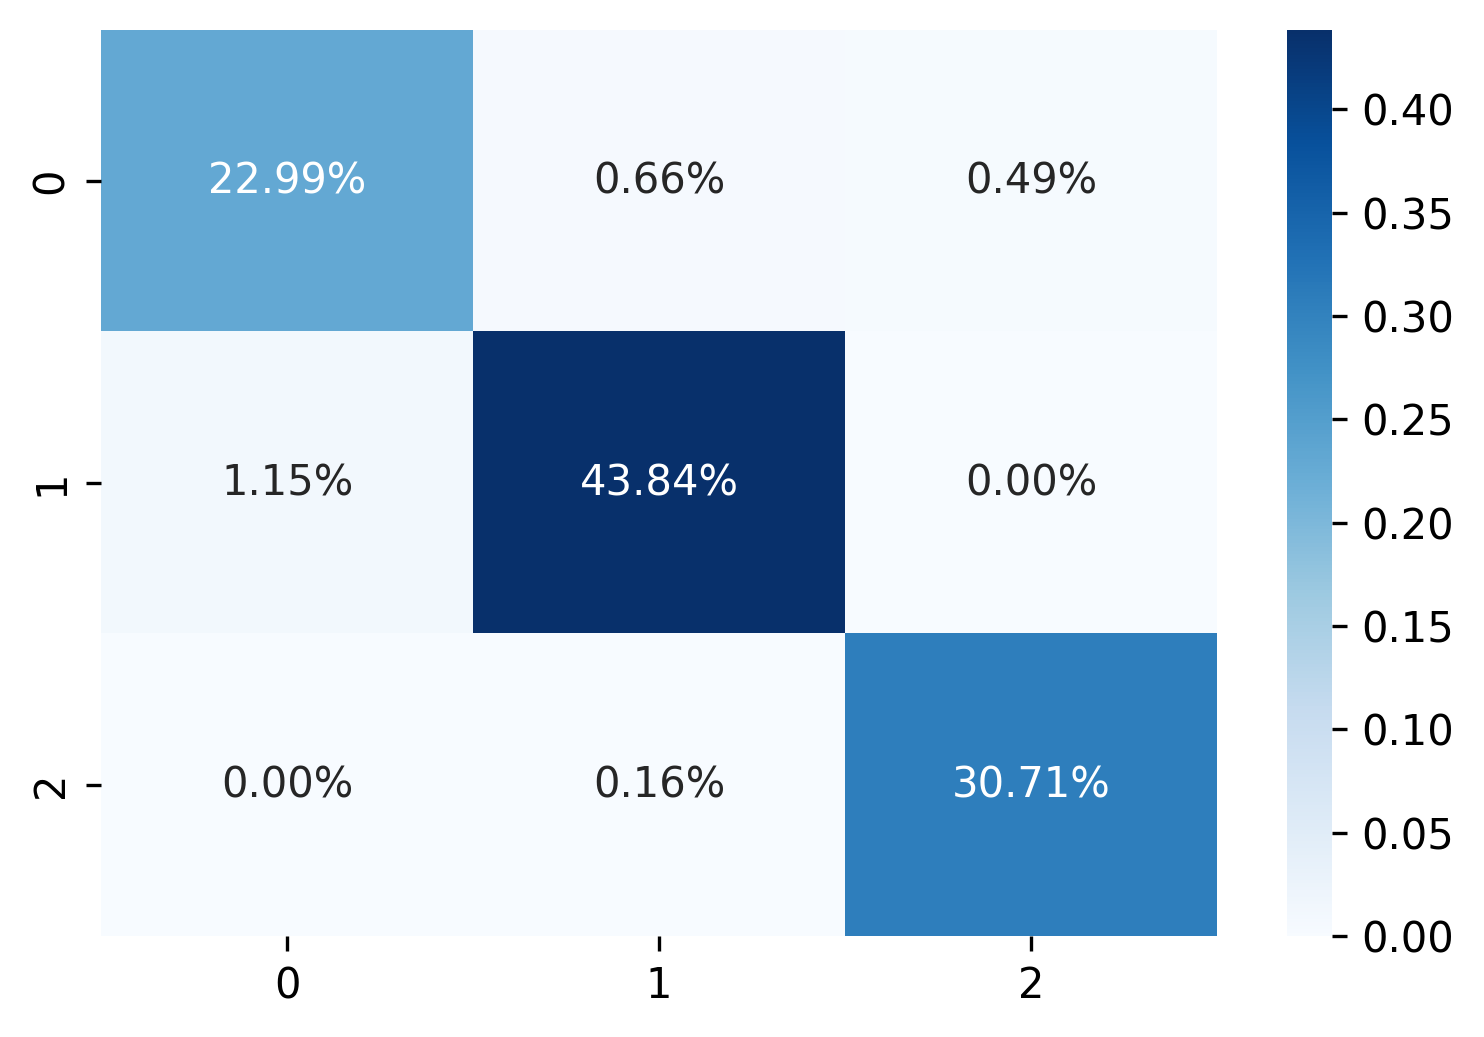

In [ ]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(testy,Y_pred)
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(testy,Y_pred))
print('Report : ')
print(classification_report(testy,Y_pred))

plt.figure(dpi=300),sns.heatmap(results/np.sum(results), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(testy, Y_pred, pos_label=2)
metrics.auc(fpr, tpr)

0.9947061201799161

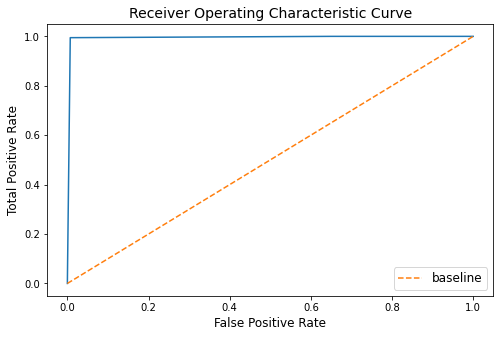

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);
